<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Борис! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

# 1 Импортируем все библиотеки


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from tqdm import tqdm
import matplotlib.pyplot as plt

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

## Откройте и изучите файл

In [2]:


df = pd.read_csv('/datasets/users_behavior.csv')
df.head()


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не стоит выводить весь датафрейм. Да, внешне ты видишь первые и последние пять строк. Но под капотом интерпретатор python работает со всем датафреймом, занимается оперативная память, пишутся служебные файлы... По итогу это может привести к замедлению работы и проблемам с работоспособностью тетрадки.
    
Лучше всегда явно ограничивать количество обрабатываемых значений.
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


изменим тип данных столбца на int 

In [4]:
df['messages']=df['messages'].astype("int")

Проверим значения содержащиеся в столбцах

In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Данные загружены и исследованы.</div>

# Вывод


Данные впорядке,
Пропущенных значений нет
Типы столбцов в порядке
Дубликатов нет


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Разбейте данные на выборки

In [6]:
features = df.loc[:,~df.columns.isin(["is_ultra"])]
target = df["is_ultra"]

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Вижу что ты заботишья о читаемости и корректных именах переменных. Но выбранное тобой имя `design_matrix` не является "говорящим". Можно использовать `features` - признаки

----    
    
Выбранный тобой способ убрать колонку из признаков имеет право на жизнь, но мне кажется использование drop() выглядит более понятно.  Но это очень субъективно.    
</div>

In [7]:
(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features,
                                        target,
                                        test_size = 0.33,
                                        random_state = 12345
                                       )

Разделим выборку на тестовую и валидационную


In [8]:
(features_valid,
 features_test,
 target_valid,
 target_test) = train_test_split(features_test,
                                        target_test,
                                        test_size = 0.5,
                                        random_state = 12345
                                       )

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Выборки получены корректно</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Совет:  обрати внимание на аргумент stratify функции train_test_split. Стратификация особенно важна, когда у нас мало данных и возможен дисбаланс классов в обучении / валидации / тесте.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Рекомендую явно вывести размеры получившихся выборок (с использованием .shape и print), это поможет быстро оценить корректность разделения на выборки.
</div>

## Исследуйте модели

Random Forest

In [9]:
best_RF = None
best_accuracy_RF = 0
best_est_RF = 0
best_depth_RF = 0
for est in tqdm(range(2,51)):
    for depth in range(2,25):
        RF = RandomForestClassifier(random_state = 12345,n_estimators = est, max_depth = depth)
        RF.fit(features_train,target_train)
        prediction_valid_RF = RF.predict(features_valid)
        accuracy_RF = accuracy_score(prediction_valid_RF, target_valid)
        if best_accuracy_RF < accuracy_RF:
            best_RF = RF
            best_depth_RF = depth
            best_est_RF = est
            best_accuracy_RF = accuracy_RF

100%|██████████| 49/49 [01:39<00:00,  2.03s/it]


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Случайный лес исследован корректно:
    
 - исследовано 49х23 комбинаций значений гиперпараметров
 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле
</div>

Decision Tree

In [10]:
best_DT = None
best_accuracy_DT = 0
best_depth_DT = 0
for depth in tqdm(range(2,22)):
    DT = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    DT.fit(features_train,target_train)
    prediction_valid_DT = DT.predict(features_valid)
    accuracy_DT = accuracy_score(prediction_valid_DT, target_valid)
    if best_accuracy_DT < accuracy_DT:
        best_DT = DT
        best_accuracy_DT = accuracy_DT
        best_depth_DT = depth

100%|██████████| 20/20 [00:00<00:00, 106.88it/s]


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Дерево решений исследовано  корректно:
    
 - исследовано 48 значений гиперпараметров
 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Нет смысла исследовать настолько глубокие деревья. Попробую объяснить почему. Количество листьев в деревьях растет экспоненциально ( фолмула 2**(N-1)), и дерево, в котором все ветви одной длинны может запомнить всю нашу обучающую выборку уже на уровне 12. На практике, дерево полностью запоминает выборку ближе к 20. Это можно легко увидеть, если обучить просто случайное дерево без аргументов, а затем посмотреть его характеристики.
    
Вот график, показывающий метрики для дерева решений на этом проекте. После 22 модель выходит на плато, т.е. полностью переобучается.
    
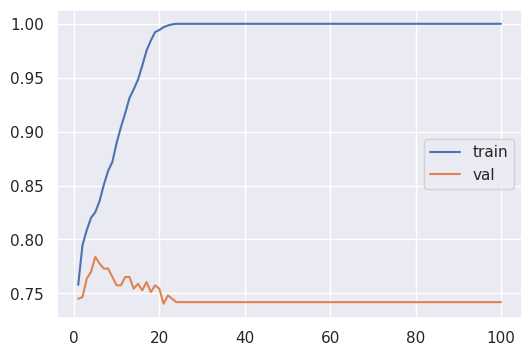    
</div>

Logistic Regression

In [12]:
LR = LogisticRegression(random_state = 12345,max_iter= 1000,tol=1e-5,solver = 'lbfgs' )
LR.fit(features_train,target_train)
prediction_valid_LR = LR.predict(features_valid)
accuracy_LR = accuracy_score(prediction_valid_LR, target_valid)

In [13]:
print(f"Logistic Regression: {accuracy_LR}")
print(f"Random Forest: {best_accuracy_RF}")
print(f"Decision Tree: {best_accuracy_DT}")

Logistic Regression: 0.7566037735849057
Random Forest: 0.8245283018867925
Decision Tree: 0.8018867924528302


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Логистическая регрессия исследована корректно.
</div>


Вывод

Основываясь на показателе точности, можно прийти к выводу, что наиболее качественные результаты прогнозирует Random Forest

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, есть выводы, и выбрана лучша модель. 
</div>


## Проверьте модель на тестовой выборке

 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
 <div class="alert alert-danger">
К данному этапу мы должны подойти с одной выбранной моделью. Любое использование тестовой выборки (в том числе для выбора лучшей модели) - это нарушение.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>общий дизайн ML исследования</b>

В курсе мы используем следующую схему оценки качества алгоритмов:

1. Все данные делятся на 3 части: 
   - обучение,
   - валидация,
   - тест.

2. Каждый из алгоритмов будет обучен на обучающей выборке. 
3. Подбор гиперпараметров мы осуществляем с помощью оценки на валидационной выборке.
4. Когда гиперпараметры подобраны, качество каждого алгоритма мы оцениваем с помощью валидационной выборки.
    
5. Выбираем лучший по оценке на валидационной выборке.
6. И уже самый лучший алгоритм оцениваем по тестовой выборке.


</div>

In [16]:

prediction_test_RF = best_RF.predict(features_test)


In [17]:

accuracy_RF_test = accuracy_score(prediction_test_RF, target_test)


In [18]:

print(f"Random Forest: {accuracy_RF_test}")


Random Forest: 0.7777777777777778


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Совет:  Сейчас, когда гиперпараметры подобраны и валидационная выборка нам не нужна, мы можем обучить модель на большой выборке (обучающая + валидационная), а тестирование новой модели произвести уже на тестовой выборке.
    
Объединить выборки можно с помощью pd.concat
</div>

Вывод

Наиболее адекватные предсказания делает Random Forest, это видно по точности предсказания на валидационной и на тестовой выборке

## (бонус) Проверьте модели на адекватность

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В основе проверки на адекватность лежит очень простая идея. Модель считается адекватной, если способна "побить" любой "наивный" алгоритм, например предсказывающий случайный или постояный ответ. 

Для нашего проекта самую высокую точность дает  "наивный" алгоритм, всегда предсказывающий самый популярный ответ (у нас это 0). Проверить точность такого подхода можно вручную или используя DummyClassifier.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75


<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Проект принят. Поздравляю и желаю дальнейших успехов!
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

В целом мне все понравилось: твоя работа выполнена на хорошем уровне с минимальными помарками.
Также работа выглядит аккуратной и хорошо оформленной.
Вижу, что тебе дается python, и инструментарий машинного обучения.

Ошибка, которую нужно обязательно исправить (красный комментарий):  Финальное тестирование мы выполняем для одной модели, выбранной по оценкам на валидации. 

     
Жду твоих исправлений :)
</div>